# A. End-to-End

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## 1. Reading data

In [2]:
path = 'data_endtoend/'
files = os.listdir(path)
files

['file1.csv', 'file2.csv']

#### Option 1

In [3]:
file1 = pd.read_csv("data_endtoend/file1.csv")
file1.head()

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


In [4]:
len(file1)

1007

In [5]:
file2 = pd.read_csv("data_endtoend/file2.csv")
file2.head()

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,185602,WI,F,400,232,315.0,0,10504,1,86,279.0,264,9.533333,28,0,R2,10.0
1,23603,SC,M,824,348,400.0,0,14663,2,40,371.0,365,12.500000,1,5801,S2,25.0
2,112943,OK,F,855,345,560.0,10,17869,2,64,384.0,508,8.729167,2,3601,T1,12.0
3,44853,FL,M,578,246,323.0,0,14121,3,13,323.0,275,10.642857,1,2912,C3,12.0
4,83094,MN,F,699,246,319.0,0,11020,1,81,254.0,304,13.600000,0,1211,T2,20.0


In [6]:
len(file2)

500

In [7]:
#concat both, check lengths, drop duplicates
df = pd.concat([file1,file2])
df.head()

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


In [8]:
len(df)

1507

In [9]:
df.CONTROLN.nunique() #how many different unique id's

999

In [10]:
df = df.drop_duplicates(["CONTROLN"])
len(df)

999

#### Option 2

In [11]:
df = pd.DataFrame()
for file in files:
    if file.endswith('.csv'):
        data = pd.read_csv(path + file)
        df = pd.concat([df, data])       
df = df.drop_duplicates(["CONTROLN"])
df.head()

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


## 2. First explorations (info, describe...)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONTROLN  999 non-null    int64  
 1   STATE     999 non-null    object 
 2   GENDER    960 non-null    object 
 3   HV1       997 non-null    object 
 4   IC1       999 non-null    int64  
 5   IC4       998 non-null    float64
 6   HVP1      999 non-null    int64  
 7   IC5       999 non-null    object 
 8   POBC1     999 non-null    int64  
 9   POBC2     999 non-null    int64  
 10  IC2       998 non-null    float64
 11  IC3       999 non-null    int64  
 12  AVGGIFT   999 non-null    float64
 13  TCODE     999 non-null    int64  
 14  DOB       999 non-null    int64  
 15  DOMAIN    999 non-null    object 
 16  TARGET_D  999 non-null    float64
dtypes: float64(4), int64(8), object(5)
memory usage: 140.5+ KB


## 3. Data Cleaning

In [13]:
df.columns

Index(['CONTROLN', 'STATE', 'GENDER', 'HV1', 'IC1', 'IC4', 'HVP1', 'IC5',
       'POBC1', 'POBC2', 'IC2', 'IC3', 'AVGGIFT', 'TCODE', 'DOB', 'DOMAIN',
       'TARGET_D'],
      dtype='object')

In [14]:
#LOWER changes capital letters to lowercase
df.columns = [column.lower() for column in df.columns] 
df.head()

,controln,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


In [15]:
#ControlN is the id, unique, so I passed it as the index
df = df.set_index('controln')  #optional
df.head()

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


###### From the .info above i can see that some numericals are considered as categoricals
###### Let's fix that first for HV1 and IC5

##### Correct HV1

In [16]:
# Check the different unique values
df.hv1.unique()

array(['AAA896', '537.00', '725.00', 'AAA1095', '995.00', '764.00',
       '775.00', '890.00', nan, 'AAA2294', '1569', '3515', '1026', '0',
       '376', '890', '1513', '948', '258', '1951', '556', '1040', '603',
       '526', '717', '1011', '1063', '291', '1538', '592', '871', '403',
       '715', '2346', '559', '596', '706', '878', '1275', '2362', '718',
       '2531', '2089', '765', '832', '1458', '1590', '613', '477', '424',
       '383', '688', '3500', '2143', '625', '1560', '716', '1247', '611',
       '1431', '1089', '435', '1409', '647', '415', '492', '1043', '3668',
       '3491', '192', '824', '428', '417', '399', '2377', '2016', '933',
       '619', '3303', '960', '1236', '473', '1055', '1509', '1953', '927',
       '2098', '5209', '476', '1515', '2158', '1110', '581', '563', '740',
       '516', '575', '2357', '645', '825', '531', '195', '423', '2725',
       '359', '1373', '1439', '889', '1993', '618', '3259', '151', '892',
       '612', '919', '697', '5059', '5667', '2750

In [17]:
# OPTION 1 
df['hv1'] = df['hv1'].apply(lambda x: float(str(x).replace('AAA', '')))
df.head()

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
44060,FL,M,896.0,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
96093,IL,M,537.0,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
43333,FL,F,725.0,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
21885,NC,M,1095.0,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
190108,FL,F,995.0,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


In [18]:
df[df['hv1'].isna() == True]

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
173223,CA,F,NaN,184,250.0,0,8708,2,63,206.0,235,8.818182,0,1801,T2,10.0
116894,TX,M,NaN,368,531.0,5,33797,2,42,457.0,450,12.250000,1,2201,U1,20.0


In [19]:
# OPTION 2
def convert_numbers(i):
    try:
        x = float(i)
    except:
        x = float(i.replace('AAA', ''))
    return x
    
df['hv1'] = df['hv1'].apply(convert_numbers)

In [20]:
# OPTION 3
def convert_numbers(i):
    try:
        x = float(i)
    except:
        x = float(i.replace('AAA', ''))
    return x

#df['hv1'] = list(map(convert_numbers, df['hv1']))

##### Correct IC5

In [21]:
# Unique 

In [22]:
df.ic5.unique()

array(['21975', '19387', '18837', '14014', '17991', '16022', '13491',
       '17872', '8708', '17838', '25775', '20068', '13803', '0', '10755@',
       '9493', '28124', '17728', '4236', '17208', '11779', '26962',
       '12038', '12826', '15614', '17606', '14023', '8370', '15627',
       '12220', '15336', '9704', '12617', '14552', '10511', '33797',
       '5273', '10420', '22281', '20971', '21179', '17292', '21094',
       '10484', '15150', '11972', '19185', '7559', '11792', '10621',
       '9497', '14045', '16561', '26034', '12935', '19102', '13816',
       '11136', '16891', '12313', '10498', '16777', '10692', '15611',
       '18492', '11449', '13218', '49744', '32964', '32718', '7361',
       '13090', '11192', '9715', '11428', '19545', '17882', '14104',
       '10427', '24251', '19518', '25882', '9819', '11289', '23170',
       '21667', '14428', '13564', '52654', '10966', '25787', '33235',
       '21875', '9667', '10726', '10701', '13293', '9843', '23786',
       '6826', '9747', '104

In [23]:
#OPTION 1
for i in df['ic5']:
    try:
        x = float(i)
    except Exception as error:
        print(error)
        x = float(i.replace('@', '')) 

could not convert string to float: '10755@'
could not convert string to float: '10909@'
could not convert string to float: '10909@'
could not convert string to float: '10909@'
could not convert string to float: '10909@'
could not convert string to float: '10909@'


In [24]:
# OPTION 2
df["ic5"] = df["ic5"].apply(lambda x: float(str(x).replace("@","")))

In [25]:
# OPTION 3
def cleaning_ic5 (i):
    try:
        x = float(i)
    except:
        x = float(i.replace('@', ''))
    return x
    
df['ic5'] = df['ic5'].apply(cleaning_ic5)

In [26]:
df.ic5.unique() 

array([ 21975.,  19387.,  18837.,  14014.,  17991.,  16022.,  13491.,
        17872.,   8708.,  17838.,  25775.,  20068.,  13803.,      0.,
        10755.,   9493.,  28124.,  17728.,   4236.,  17208.,  11779.,
        26962.,  12038.,  12826.,  15614.,  17606.,  14023.,   8370.,
        15627.,  12220.,  15336.,   9704.,  12617.,  14552.,  10511.,
        33797.,   5273.,  10420.,  22281.,  20971.,  21179.,  17292.,
        21094.,  10484.,  15150.,  11972.,  19185.,   7559.,  11792.,
        10621.,   9497.,  14045.,  16561.,  26034.,  12935.,  19102.,
        13816.,  11136.,  16891.,  12313.,  10498.,  16777.,  10692.,
        15611.,  18492.,  11449.,  13218.,  49744.,  32964.,  32718.,
         7361.,  13090.,  11192.,   9715.,  11428.,  19545.,  17882.,
        14104.,  10427.,  24251.,  19518.,  25882.,   9819.,  11289.,
        23170.,  21667.,  14428.,  13564.,  52654.,  10966.,  25787.,
        33235.,  21875.,   9667.,  10726.,  10701.,  13293.,   9843.,
        23786.,   68

### Check other Categoricals

##### Correct State

In [27]:
# Check the different unique values
df.state.unique()

array(['FL', 'IL', 'NC', 'TX', 'CA', 'NV', 'Cali', 'AP', 'KS', 'MI', 'OK',
       'AR', 'IN', 'MT', 'WI', 'MO', 'HI', 'UT', 'GA', 'WA', 'ID', 'CT',
       'AL', 'ND', 'SC', 'IA', 'CO', 'LA', 'OR', 'SD', 'TN', 'NM', 'AZ',
       'MN', 'KY', 'NJ', 'NE', 'California', 'MS', 'NY', 'Arizona', 'WY',
       'Tennessee'], dtype=object)

In [28]:
df['state'] = df['state'].apply(lambda x: 'CA' if str(x).lower().startswith('cali')
                                                 else 'TN' if x == 'Tennessee'
                                                 else 'AZ' if x == 'Arizona'
                                                 else x)
df.state.value_counts()

CA    228
FL     85
TX     75
IL     66
MI     51
NC     42
WA     35
GA     33
IN     31
WI     30
MO     25
OR     22
MN     22
AZ     21
TN     21
CO     19
SC     19
OK     17
AL     17
KY     15
LA     15
IA     15
KS     10
NV     10
NE      9
ID      9
AR      9
SD      7
NM      7
MS      7
UT      5
HI      5
MT      5
ND      4
WY      3
CT      2
NJ      1
AP      1
NY      1
Name: state, dtype: int64

##### Correct Gender

In [29]:
# Check the different unique values (df or cat)
df.gender.unique()

array(['M', 'F', 'female', 'Male', nan, 'U', 'J', 'male', 'Female',
       'feamale'], dtype=object)

In [30]:
# Assign M for males, F for femails and U for the rest
df["gender"]=df["gender"].apply(lambda x: "M" if str(x).lower().startswith("m")
                               else "F" if str(x).lower().startswith("f")
                               else "U") # Fill NaN in the column gender with U
df.gender.unique() 

array(['M', 'F', 'U'], dtype=object)

In [31]:
df["gender"]=df["gender"].fillna("U") # Way of filling nulls / nans

In [32]:
df.isna().sum() #To check how many Nan/Null values in each variable

state       0
gender      0
hv1         2
ic1         0
ic4         1
hvp1        0
ic5         0
pobc1       0
pobc2       0
ic2         1
ic3         0
avggift     0
tcode       0
dob         0
domain      0
target_d    0
dtype: int64

In [33]:
df = df.dropna() # let's remove the few nulls that we have
df.isna().sum()

state       0
gender      0
hv1         0
ic1         0
ic4         0
hvp1        0
ic5         0
pobc1       0
pobc2       0
ic2         0
ic3         0
avggift     0
tcode       0
dob         0
domain      0
target_d    0
dtype: int64

## 4. EDA

In [34]:
df.describe() #ONLY ON NUMERICALS

,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,target_d
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1183.019095,351.507538,444.596985,16.248241,16601.245226,6.813065,55.664322,401.335678,399.520603,11.878934,38.109548,2548.056281,16.057075
std,1079.157186,173.587385,177.457052,29.452477,10284.740452,9.302497,21.593601,181.331327,168.354835,7.863905,214.263018,2070.790488,14.662204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.361111,0.000000,0.000000,1.000000
25%,537.500000,238.000000,325.000000,0.000000,10972.500000,1.000000,41.000000,283.000000,286.000000,7.285714,0.000000,0.000000,10.000000
50%,787.000000,319.000000,405.000000,1.000000,14194.000000,4.000000,57.000000,364.000000,360.000000,10.000000,1.000000,2501.000000,14.000000
75%,1410.500000,420.500000,526.500000,14.000000,18819.500000,9.000000,74.000000,474.500000,477.500000,14.527778,2.000000,4306.500000,20.000000
max,5980.000000,1500.000000,1263.000000,99.000000,174523.000000,73.000000,96.000000,1500.000000,1185.000000,89.444444,4002.000000,8305.000000,200.000000


In [35]:
df.describe().apply(lambda x: round(x,2)) # a lambda just to round it pretty

,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,target_d
count,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00
mean,1183.02,351.51,444.60,16.25,16601.25,6.81,55.66,401.34,399.52,11.88,38.11,2548.06,16.06
std,1079.16,173.59,177.46,29.45,10284.74,9.30,21.59,181.33,168.35,7.86,214.26,2070.79,14.66
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.36,0.00,0.00,1.00
25%,537.50,238.00,325.00,0.00,10972.50,1.00,41.00,283.00,286.00,7.29,0.00,0.00,10.00
50%,787.00,319.00,405.00,1.00,14194.00,4.00,57.00,364.00,360.00,10.00,1.00,2501.00,14.00
75%,1410.50,420.50,526.50,14.00,18819.50,9.00,74.00,474.50,477.50,14.53,2.00,4306.50,20.00
max,5980.00,1500.00,1263.00,99.00,174523.00,73.00,96.00,1500.00,1185.00,89.44,4002.00,8305.00,200.00


In [36]:
# Create a new dataframe with only the numerical columns using select_dtypes
num = df.select_dtypes(np.number)
num.head()

,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,target_d
controln,,,,,,,,,,,,,
44060,896.0,392,520.0,7,21975.0,6,16,430.0,466,28.000000,1,1901,100.0
96093,537.0,365,473.0,0,19387.0,1,89,415.0,410,5.666667,0,0,7.0
43333,725.0,301,436.0,3,18837.0,11,17,340.0,361,4.111111,0,2501,5.0
21885,1095.0,401,413.0,7,14014.0,1,74,407.0,399,27.277778,0,2208,38.0
190108,995.0,252,348.0,0,17991.0,5,6,280.0,316,6.000000,28,0,5.0


##### See distributions

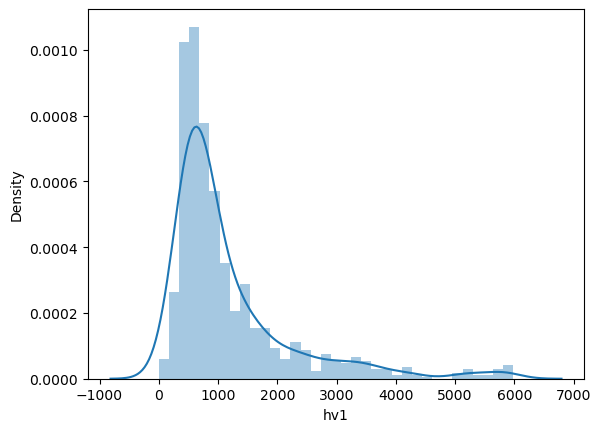

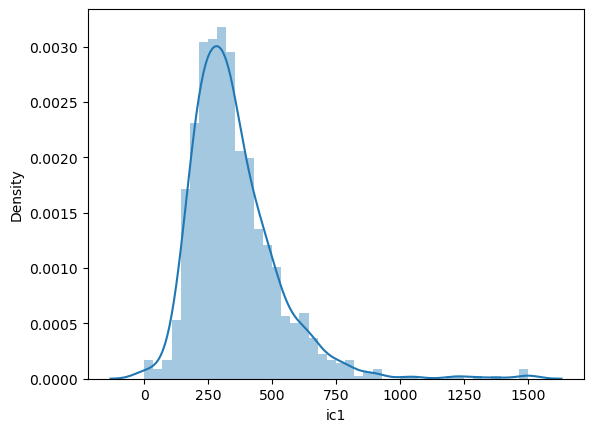

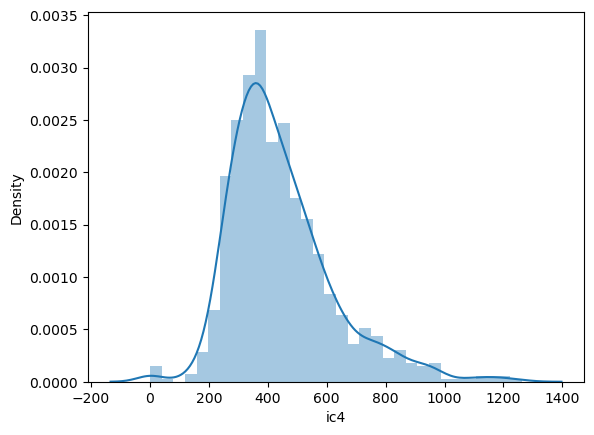

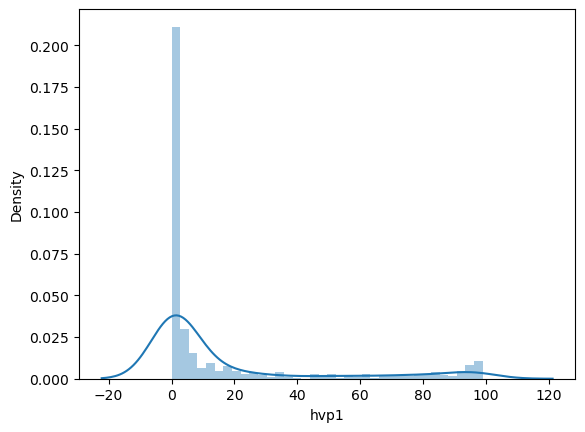

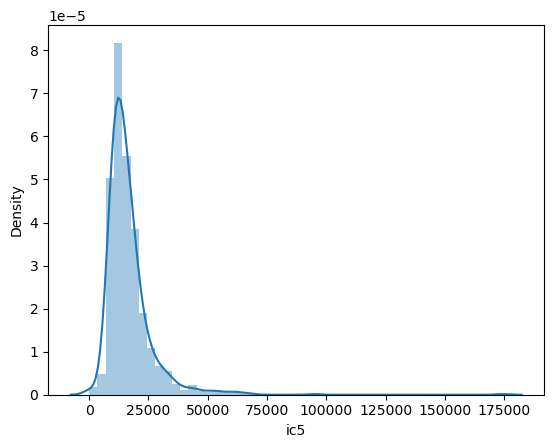

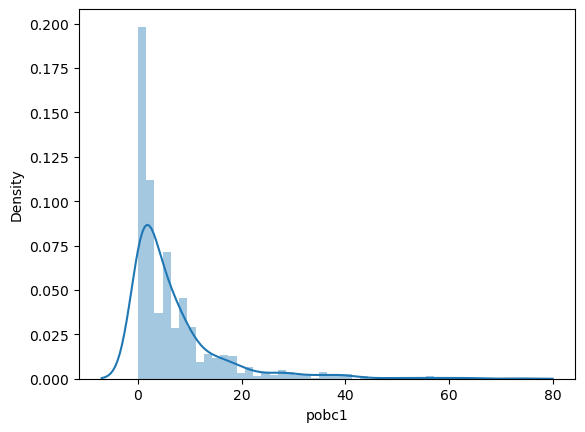

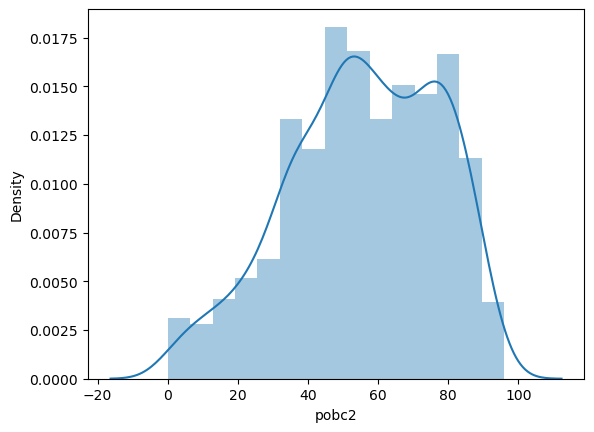

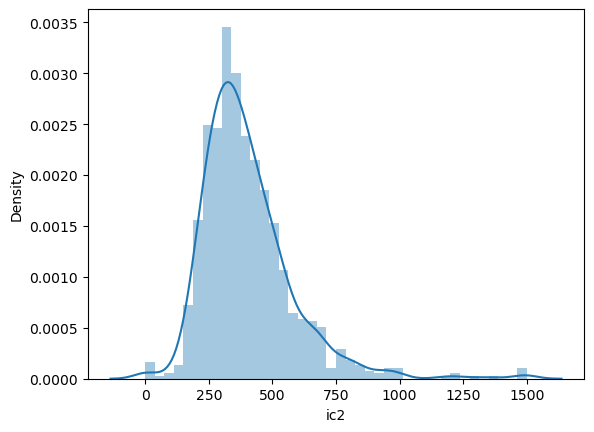

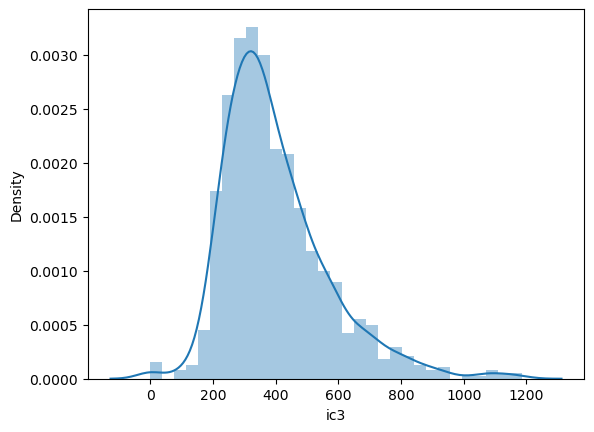

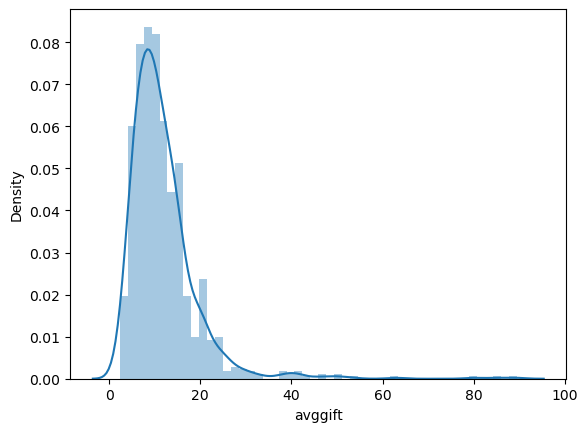

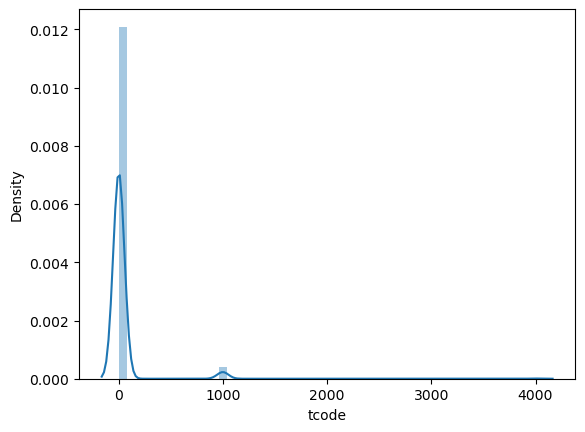

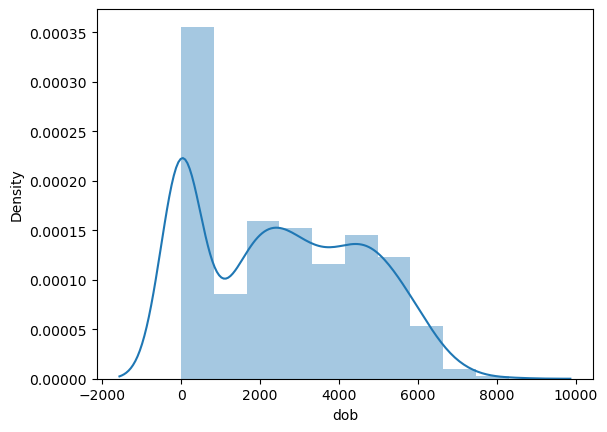

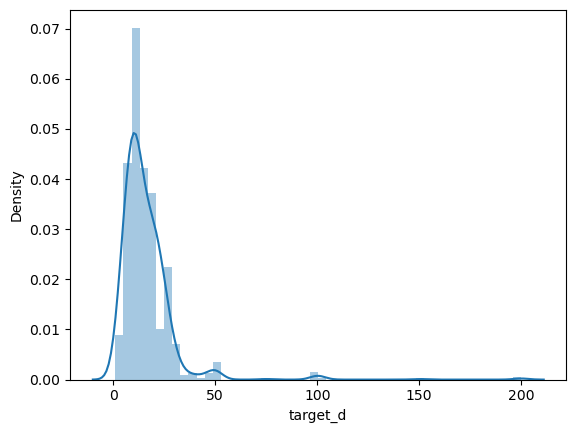

In [37]:
for column in num.columns:
    sns.distplot(df[column])
    plt.show()

##### Check correlations

In [38]:
# OPTION 1
round(df.corr(),2)

,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,target_d
hv1,1.00,0.70,0.75,0.93,0.72,0.44,-0.31,0.74,0.73,0.14,0.14,-0.01,0.07
ic1,0.70,1.00,0.93,0.61,0.80,0.16,-0.17,0.95,0.97,0.15,0.19,0.11,0.10
ic4,0.75,0.93,1.00,0.67,0.84,0.17,-0.21,0.97,0.97,0.16,0.15,0.08,0.11
hvp1,0.93,0.61,0.67,1.00,0.62,0.43,-0.28,0.65,0.65,0.12,0.08,-0.04,0.07
ic5,0.72,0.80,0.84,0.62,1.00,0.16,-0.25,0.85,0.80,0.20,0.14,0.02,0.13
pobc1,0.44,0.16,0.17,0.43,0.16,1.00,-0.40,0.16,0.18,0.06,0.04,0.00,-0.00
pobc2,-0.31,-0.17,-0.21,-0.28,-0.25,-0.40,1.00,-0.18,-0.20,-0.10,-0.02,0.03,-0.04
ic2,0.74,0.95,0.97,0.65,0.85,0.16,-0.18,1.00,0.95,0.18,0.18,0.08,0.12
ic3,0.73,0.97,0.97,0.65,0.80,0.18,-0.20,0.95,1.00,0.14,0.16,0.11,0.09
avggift,0.14,0.15,0.16,0.12,0.20,0.06,-0.10,0.18,0.14,1.00,0.00,-0.01,0.66


In [39]:
# OPTION 2
df.corr().apply(lambda x: round(x,2))

,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,target_d
hv1,1.00,0.70,0.75,0.93,0.72,0.44,-0.31,0.74,0.73,0.14,0.14,-0.01,0.07
ic1,0.70,1.00,0.93,0.61,0.80,0.16,-0.17,0.95,0.97,0.15,0.19,0.11,0.10
ic4,0.75,0.93,1.00,0.67,0.84,0.17,-0.21,0.97,0.97,0.16,0.15,0.08,0.11
hvp1,0.93,0.61,0.67,1.00,0.62,0.43,-0.28,0.65,0.65,0.12,0.08,-0.04,0.07
ic5,0.72,0.80,0.84,0.62,1.00,0.16,-0.25,0.85,0.80,0.20,0.14,0.02,0.13
pobc1,0.44,0.16,0.17,0.43,0.16,1.00,-0.40,0.16,0.18,0.06,0.04,0.00,-0.00
pobc2,-0.31,-0.17,-0.21,-0.28,-0.25,-0.40,1.00,-0.18,-0.20,-0.10,-0.02,0.03,-0.04
ic2,0.74,0.95,0.97,0.65,0.85,0.16,-0.18,1.00,0.95,0.18,0.18,0.08,0.12
ic3,0.73,0.97,0.97,0.65,0.80,0.18,-0.20,0.95,1.00,0.14,0.16,0.11,0.09
avggift,0.14,0.15,0.16,0.12,0.20,0.06,-0.10,0.18,0.14,1.00,0.00,-0.01,0.66


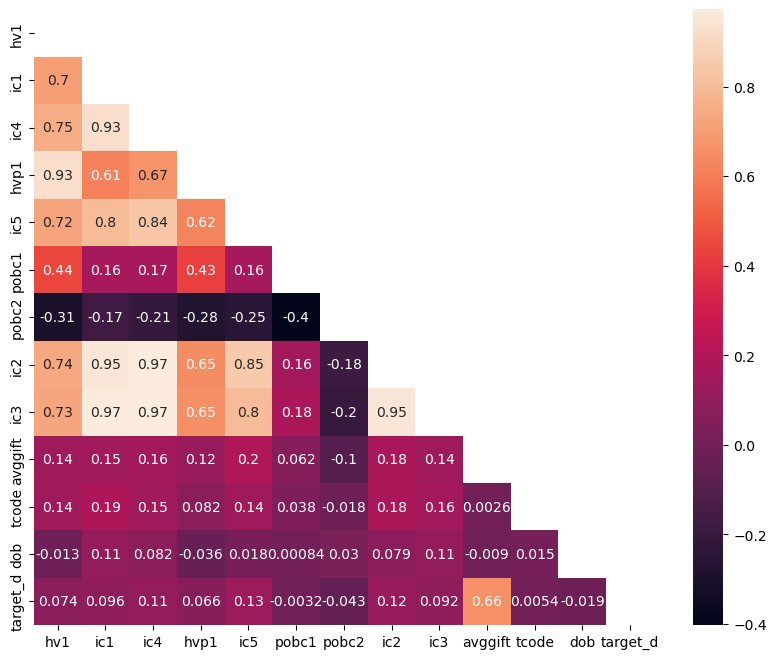

In [40]:
#HEATMAP
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

# from this you can remove multicolinearity > 0.9 with no worry...
## ... > 0.75 is better to check with the model metrics to be sure
### when removing, keep the ones that have the highest correlation with target

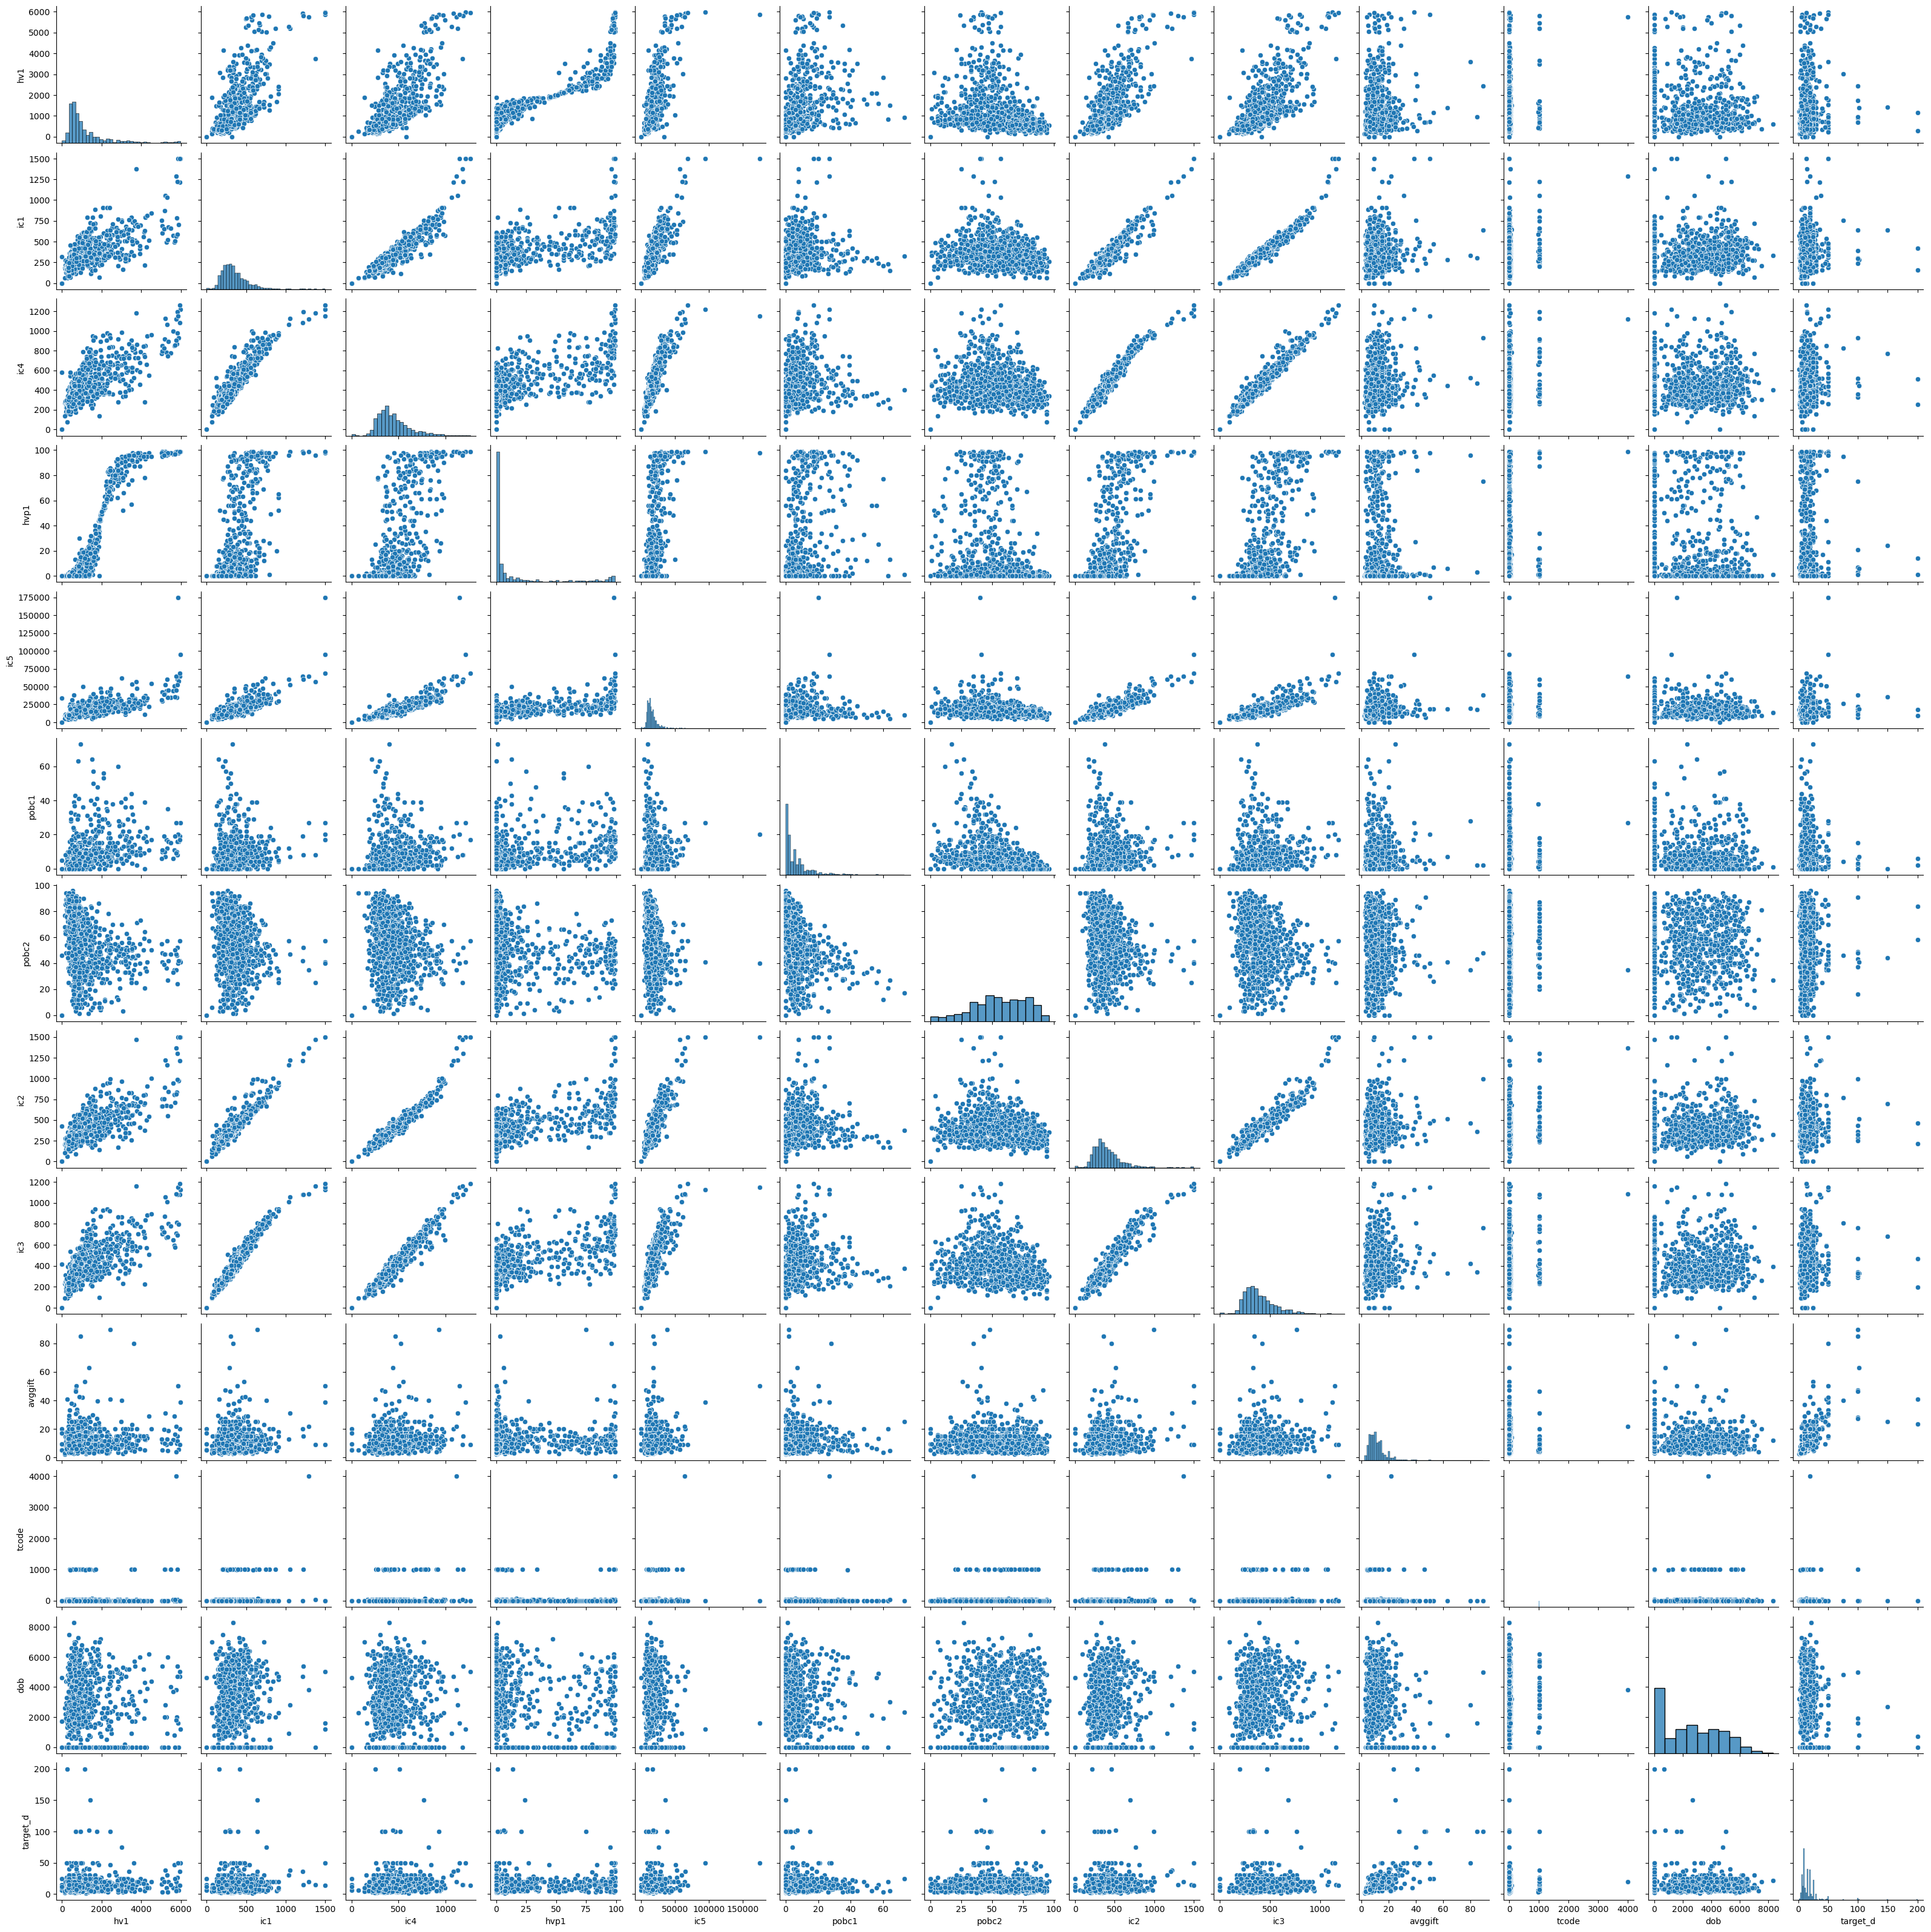

In [41]:
#covariance visualization
sns.pairplot(df)

## 5. Preprocessing

##### In the first run, I prefer not to have any scaling, just to have a benchmark on my metrics then i come back to these steps and check different scaling techniques to see which is better
##### Usually you'll choose one scaling technique for the whole dataframe. If you are going for StandardScaler, MinMaxScaler, remember to do it after the splits

#### Box-Cox Transformation

In [67]:
df_trans = df.copy()

def boxcox_transform(df):
    numeric_cols = df_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df_trans[column] = np.where(df_trans[column]<=0, np.NAN, df_trans[column]) 
        df_trans[column] = df_trans[column].fillna(df_trans[column].mean())
        transformed_data, ci = stats.boxcox(df_trans[column])
        df_trans[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci
df, _ci = boxcox_transform(df_trans)
df_trans

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
44060,FL,M,1.586035,5.265357,4.017888,1.663705,8.952887,0.791011,19.231671,4.055330,3.872216,1.553603,3.236577,612.590413,C2,3.227823
96093,IL,M,1.533353,5.187546,3.958561,4.754402,8.923126,0.934140,149.939045,4.031337,3.793462,0.499280,4.444746,1020.153020,T2,0.877524
43333,FL,F,1.565276,4.977502,3.907153,0.309710,8.916065,1.321451,20.755073,3.895328,3.714285,0.252923,4.444746,768.728139,C2,0.562848
21885,NC,M,1.604454,5.290113,3.872745,1.663705,8.838350,0.934140,120.907604,4.018154,3.776618,1.538495,4.444746,693.413334,T2,2.399712
190108,FL,F,1.595805,4.784127,3.762942,4.754402,8.904614,0.624000,4.962156,3.760691,3.630515,0.541884,3.004861,1020.153020,C2,0.562848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118862,TX,M,1.583011,5.642914,4.075996,4.754402,8.944519,1.149422,74.555704,4.236307,3.993296,0.793313,3.236577,1182.035051,S1,1.373170
30104,GA,M,1.487182,4.757918,3.718637,4.754402,8.727961,1.058747,149.939045,3.824795,3.569337,0.820231,3.236577,1408.221812,R2,1.575399
154614,CA,F,1.641399,5.554666,4.037922,4.583427,8.859559,1.149422,109.531191,4.179988,3.947055,1.174173,4.444746,1020.153020,T1,1.833607


In [66]:
df

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
44060,FL,M,2.868683,5.865423,4.655593,2.676396,2.237720,1.879461,20.324350,4.548415,4.648728,2.522226,0.000000,613.955225,C2,4.242401
96093,IL,M,2.798842,5.796559,4.604515,5.826165,2.236160,0.000000,152.294966,4.529002,4.577065,1.495200,4.415220,1021.817141,T2,1.879072
43333,FL,F,2.841107,5.610378,4.560211,1.310293,2.235789,2.556690,21.858090,4.418734,4.504949,1.251800,4.415220,770.204900,C2,1.563532
21885,NC,M,2.893211,5.887321,4.530533,2.676396,2.231694,0.000000,122.944757,4.518331,4.561729,2.507641,4.415220,694.835612,T2,3.408656
190108,FL,F,2.881686,5.438594,4.435699,5.826165,2.235188,1.679968,5.974795,4.309199,4.428570,1.537132,3.432138,1021.817141,C2,1.563532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118862,TX,M,2.864662,6.198790,4.705568,5.826165,2.237282,2.330073,76.118359,4.694475,4.758771,1.783747,0.000000,1183.823538,S1,2.376610
30104,GA,M,2.738018,5.415282,4.397378,5.826165,2.225829,2.213270,152.294966,4.361399,4.372740,1.810069,0.000000,1410.188080,R2,2.579770
154614,CA,F,2.942579,6.120985,4.672829,5.651169,2.232814,2.330073,111.447490,4.649091,4.716764,2.154895,4.415220,1021.817141,T1,2.839283


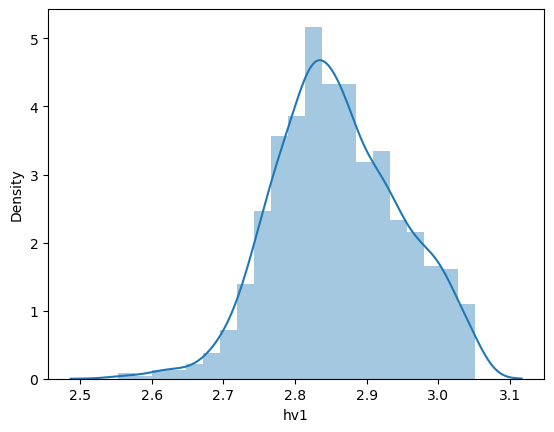

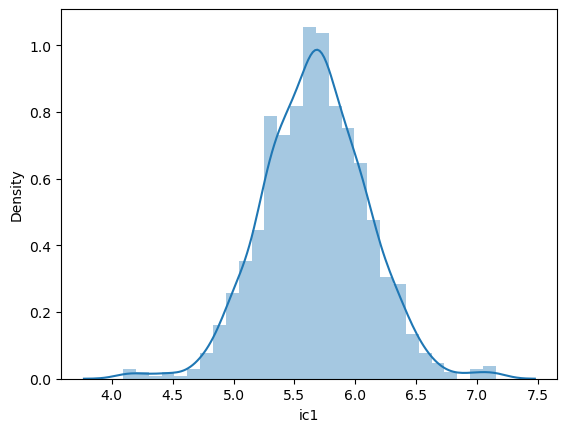

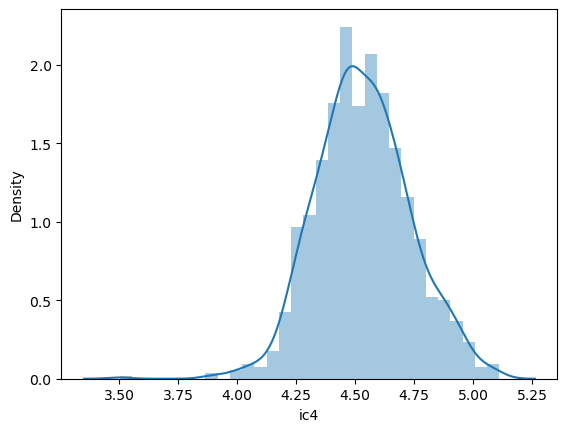

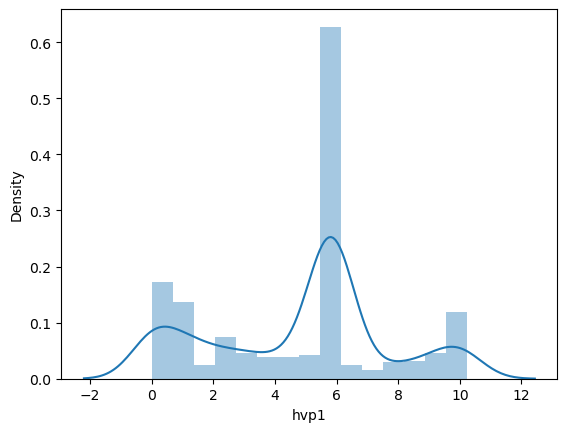

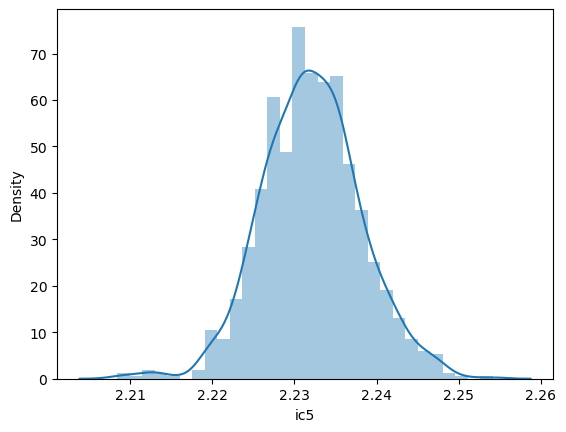

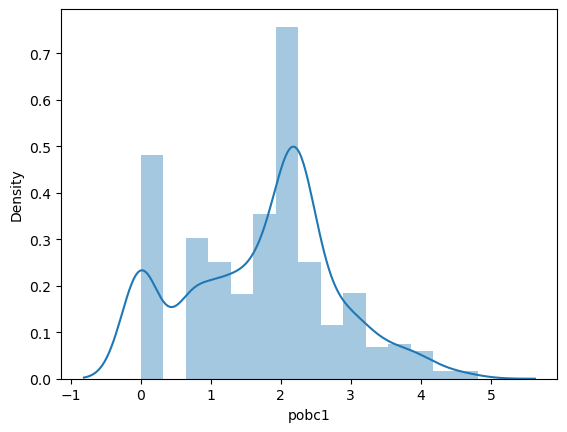

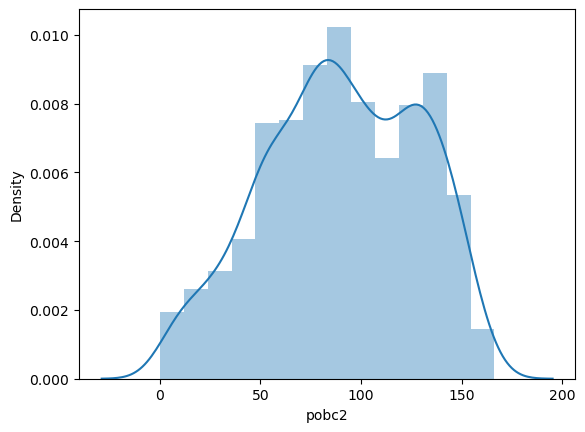

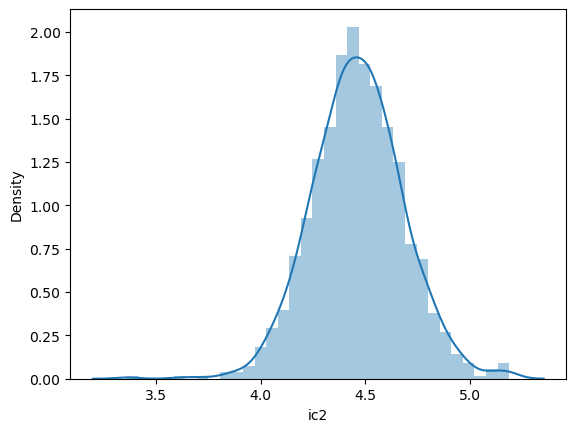

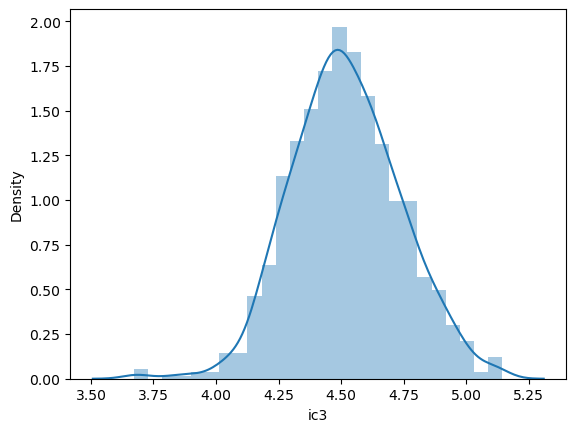

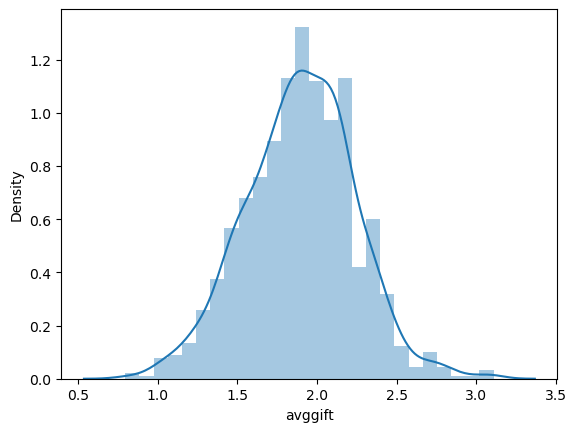

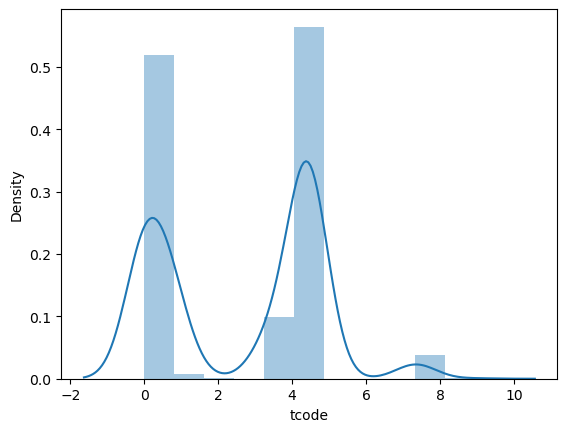

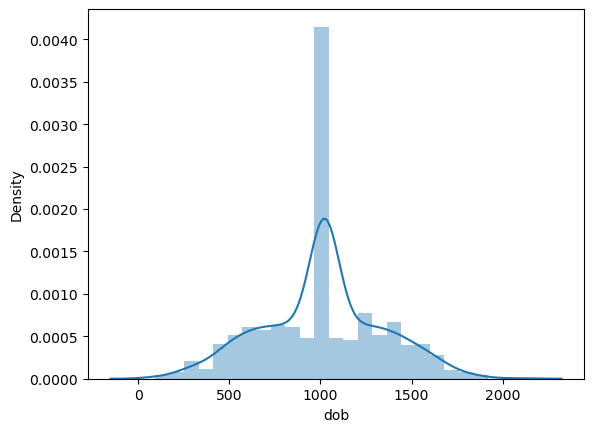

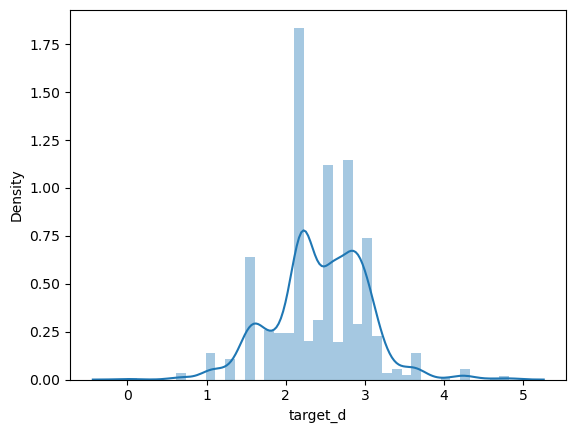

In [43]:
# See the changes in the distributions
for column in df_trans.select_dtypes(np.number).columns:
    sns.distplot(df_trans[column])
    plt.show()

#### Remove outliers

In [44]:
#FUNCTION TO REMOVE OUTLIERS
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

##### You can decide to remove outliers after log/boxcox transformation (since these might take care of some outliers for you)
##### Make sure you are droping the outliers only after the feature selection,just so you don't end up losing rows because of outliers in a column you won't use. 
##### Also we don't want to reduce our data too much

In [45]:
df1 = df.copy() #If we are not sure we use a copy df not the "good one"
df1 = remove_outliers(df1, threshold=2, skip_columns=['dob']) # we don't want to reduce our data too much,
## but we can play with the parameters to see,
## so after a better analysis we can choose which columns to drop outliers or not
df1

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
96093,IL,M,2.798842,5.796559,4.604515,5.826165,2.236160,0.000000,152.294966,4.529002,4.577065,1.495200,4.415220,1021.817141,T2,1.879072
43333,FL,F,2.841107,5.610378,4.560211,1.310293,2.235789,2.556690,21.858090,4.418734,4.504949,1.251800,4.415220,770.204900,C2,1.563532
21885,NC,M,2.893211,5.887321,4.530533,2.676396,2.231694,0.000000,122.944757,4.518331,4.561729,2.507641,4.415220,694.835612,T2,3.408656
190108,FL,F,2.881686,5.438594,4.435699,5.826165,2.235188,1.679968,5.974795,4.309199,4.428570,1.537132,3.432138,1021.817141,C2,1.563532
100640,IL,M,2.848097,6.013370,4.635581,0.000000,2.233614,0.706017,124.875162,4.604735,4.665172,2.471299,0.000000,1609.499322,S2,3.200496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118862,TX,M,2.864662,6.198790,4.705568,5.826165,2.237282,2.330073,76.118359,4.694475,4.758771,1.783747,0.000000,1183.823538,S1,2.376610
30104,GA,M,2.738018,5.415282,4.397378,5.826165,2.225829,2.213270,152.294966,4.361399,4.372740,1.810069,0.000000,1410.188080,R2,2.579770
154614,CA,F,2.942579,6.120985,4.672829,5.651169,2.232814,2.330073,111.447490,4.649091,4.716764,2.154895,4.415220,1021.817141,T1,2.839283


In [46]:
# now filter the outliers on avggift and target_d columns with a tighter threshold
df2 = remove_outliers(df1, threshold=2, skip_columns=['avggift',"target_d"])
df2

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
96093,IL,M,2.798842,5.796559,4.604515,5.826165,2.236160,0.000000,152.294966,4.529002,4.577065,1.495200,4.415220,1021.817141,T2,1.879072
43333,FL,F,2.841107,5.610378,4.560211,1.310293,2.235789,2.556690,21.858090,4.418734,4.504949,1.251800,4.415220,770.204900,C2,1.563532
21885,NC,M,2.893211,5.887321,4.530533,2.676396,2.231694,0.000000,122.944757,4.518331,4.561729,2.507641,4.415220,694.835612,T2,3.408656
190108,FL,F,2.881686,5.438594,4.435699,5.826165,2.235188,1.679968,5.974795,4.309199,4.428570,1.537132,3.432138,1021.817141,C2,1.563532
100640,IL,M,2.848097,6.013370,4.635581,0.000000,2.233614,0.706017,124.875162,4.604735,4.665172,2.471299,0.000000,1609.499322,S2,3.200496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118862,TX,M,2.864662,6.198790,4.705568,5.826165,2.237282,2.330073,76.118359,4.694475,4.758771,1.783747,0.000000,1183.823538,S1,2.376610
30104,GA,M,2.738018,5.415282,4.397378,5.826165,2.225829,2.213270,152.294966,4.361399,4.372740,1.810069,0.000000,1410.188080,R2,2.579770
154614,CA,F,2.942579,6.120985,4.672829,5.651169,2.232814,2.330073,111.447490,4.649091,4.716764,2.154895,4.415220,1021.817141,T1,2.839283


## 6. Modeling 

### Splitting data (X-y split)

In [47]:
y = df["target_d"]
X = df.drop(['target_d'],axis=1)
X = X.drop(['state','gender','domain'],axis = 1)
X.head()

,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob
controln,,,,,,,,,,,,
44060,2.868683,5.865423,4.655593,2.676396,2.237720,1.879461,20.324350,4.548415,4.648728,2.522226,0.000000,613.955225
96093,2.798842,5.796559,4.604515,5.826165,2.236160,0.000000,152.294966,4.529002,4.577065,1.495200,4.415220,1021.817141
43333,2.841107,5.610378,4.560211,1.310293,2.235789,2.556690,21.858090,4.418734,4.504949,1.251800,4.415220,770.204900
21885,2.893211,5.887321,4.530533,2.676396,2.231694,0.000000,122.944757,4.518331,4.561729,2.507641,4.415220,694.835612
190108,2.881686,5.438594,4.435699,5.826165,2.235188,1.679968,5.974795,4.309199,4.428570,1.537132,3.432138,1021.817141


In [48]:
len(X)

995

### Train-test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
len(X_train)

696

In [51]:
len(y_train)

696

In [52]:
len(X_test)

299

In [53]:
len(y_test)

299

In [54]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Predict on Test Data

In [55]:
predictions = model.predict(X_test)
predictions

array([2.7214041 , 3.18437194, 2.0378732 , 2.31447461, 2.69361794,
       2.84349866, 2.55180652, 2.68610717, 2.38306569, 1.55133444,
       2.47023101, 1.96365729, 2.90460091, 2.54295982, 2.69661192,
       2.95593082, 3.05410159, 2.4687103 , 2.11458448, 2.68869089,
       2.14580006, 2.7901957 , 3.06346596, 2.2314266 , 2.35433569,
       1.47520645, 2.49377654, 2.45879631, 2.51063845, 2.62154379,
       2.63692405, 2.81400388, 2.95838348, 3.12790309, 2.3601298 ,
       2.2750661 , 2.79831516, 2.26060993, 2.6148861 , 2.34673158,
       2.63732524, 2.74370149, 1.81134031, 2.52239153, 3.10676311,
       2.27381391, 2.79335027, 2.81624062, 2.54995108, 2.58798366,
       2.56794478, 2.77063333, 2.25808638, 2.44477061, 1.66879245,
       2.62961246, 3.0305482 , 1.57348405, 3.12201379, 3.10727653,
       2.37809643, 1.85958963, 1.93267546, 2.42329865, 2.75519137,
       2.24094114, 3.32674539, 2.30476248, 2.43317837, 2.44326768,
       2.66564191, 2.03653636, 2.49687407, 2.77622154, 2.30438

### Evaluate the Model

#### R2, RMSE, MSE, MAE

In [56]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

# print them in a beautiful way

R2 =  0.6198880971633212
RMSE =  0.34035030817372136
The value of the metric MSE is  0.11583833227394709
MAE =  0.2594284659983996


In [57]:
np.max(y)

4.822000767626218

##### ATTENTION! We have applied the Box-Cox to the Target so we need to invert the transformation!

In [58]:
from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci['target_d'])

In [59]:
# calculate the modified metrics
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

RMSE =  13.39387043626417
The value of the metric MSE is  179.39576526343134
MAE =  11.859790721639927


#### Create dataframe for visualising the differences between real and predicted values

In [60]:
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['target_d'])
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
controln,,,
182286,20.0,17.543565,2.456435
139799,25.0,29.458152,4.458152
98374,15.0,8.304569,6.695431
191663,10.0,11.212367,1.212367
18948,17.0,17.011469,0.011469
...,...,...,...
134032,10.0,19.051931,9.051931
142554,15.0,17.096535,2.096535
10789,3.0,6.913216,3.913216


In [61]:
results.sort_values('diff', ascending=False).head(50)

,true,pred,diff
controln,,,
13188,100.0,47.032295,52.967705
15668,45.0,12.085059,32.914941
97552,50.0,18.213896,31.786104
16863,50.0,18.641744,31.358256
181655,50.0,18.909696,31.090304
153450,47.0,26.988452,20.011548
152133,5.0,24.839248,19.839248
14394,10.0,27.639134,17.639134
68427,25.0,41.334279,16.334279


In [62]:
# check predictions on donations over than 40 dollars


On the model improvement phase, going back and forth is normal
... so this isn't the end, but a new beginning ...

¯\\_(ツ)_/¯

### Represent results

<AxesSubplot:xlabel='true', ylabel='pred'>

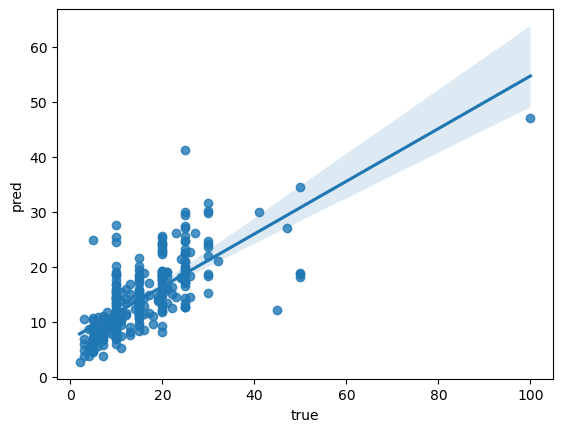

In [63]:
sns.regplot(results['true'], results['pred'])

##### Which are your conclusions after seeing the data?

In [64]:
# The model seems to perform better in small values than in high ones. Maybe removing outliers in the target could improve the 